## Прикладные задачи анализа данных
## Итоговая работа
### Тема: Blood donation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,5)
sns.set(style='white')

pd.options.mode.chained_assignment = None  # default='warn'

Given is the variable name, variable type, the measurement unit and a brief description.<br>
Указано 
<font color="blue">
- имя переменной
- тип переменной
- единица измерения 
- краткое описание. 
</font>

| Variable | Measurement	| Definition | Перевод |
| :-- | :-- | :-- | :-- |
| Recency | months| months since last donation| Недавность - месяцы с момента последней сдачи крови |
| Frequency |  | total number of donation| Частота - общее количество сдач крови |
| Monetary | c.c.(куб.см) | total blood donated in c.c.| Общее количество сданной крови в (?) |
| Time | months | months since first donation | Время - месяцы с момента первого пожертвования |
| Target |   | a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood)| Бинарная переменная, представляющая, сдавал ли он/она кровь в марте 2007 года (1 означает сдачу крови; 0 означает отказ от сдачи крови) |

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.<br><br>
Source: https://www.kaggle.com/code/mmmarchetti/predicting-blood-donations

In [2]:
df = pd.read_csv('transfusion.csv', sep=',', header=0, names=["Recency", "Frequency", "Monetary", "Time", "Target"])

df.head()

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


The "Blood Transfusion Service Center" is a classification problem. <br>

# Анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
df["Target"].value_counts() # 178/570 ~ 0.31

0    570
1    178
Name: Target, dtype: int64

In [5]:
df.describe()

,Recency,Frequency,Monetary,Time,Target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df.describe(percentiles=[0.9, 0.95])

,Recency,Frequency,Monetary,Time,Target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
90%,21.000000,12.000000,3000.000000,73.000000,1.000000
95%,23.000000,16.000000,4000.000000,82.650000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


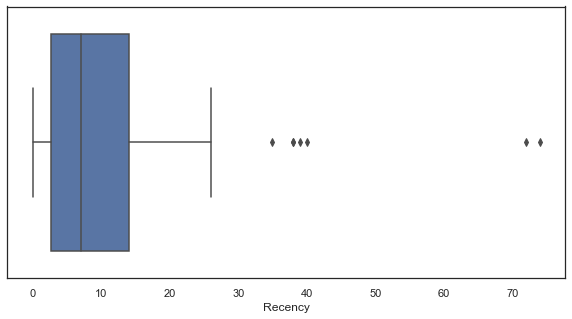

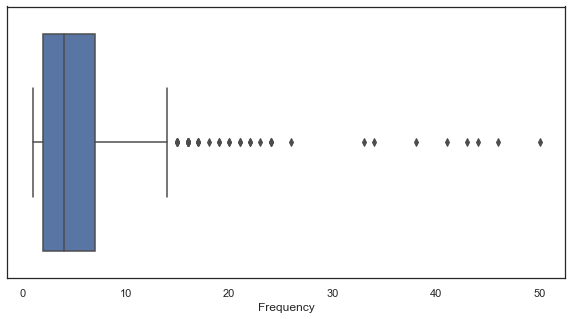

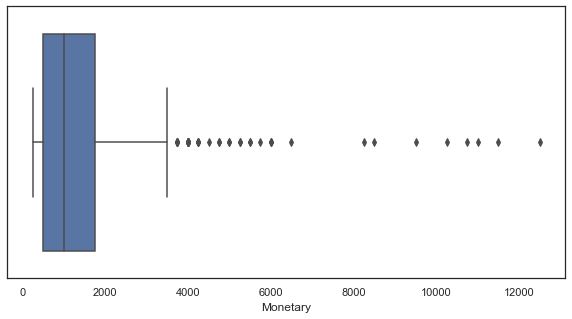

In [7]:
num_cols = df.columns[:-2]

for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[i]);
    plt.show()

# Подготовка данных

In [8]:
from scipy import stats

for i in num_cols:
    median = df[i].median()
    outliers = np.abs(stats.zscore(df[i])) > 2
    print("Z-score for ", i, "is higher than 2 in", df[i][outliers].count(), "rows in ", np.where(np.abs(stats.zscore(df[i])) > 2), "\n")
    df[i][outliers] = np.nan
    df[i].fillna(median, inplace=True)

Z-score for  Recency is higher than 2 in 8 rows in  (array([475, 495, 496, 497, 498, 499, 746, 747], dtype=int64),) 

Z-score for  Frequency is higher than 2 in 22 rows in  (array([  0,   3,   4,   9,  10,  44,  55, 115, 241, 278, 341, 500, 501,
       502, 503, 504, 505, 506, 508, 517, 528, 677], dtype=int64),) 

Z-score for  Monetary is higher than 2 in 22 rows in  (array([  0,   3,   4,   9,  10,  44,  55, 115, 241, 278, 341, 500, 501,
       502, 503, 504, 505, 506, 508, 517, 528, 677], dtype=int64),) 



In [9]:
for i in num_cols:
    print(i, sum(df[i]==df[i].median())/748)

Recency 0.0213903743315508
Frequency 0.11229946524064172
Monetary 0.11229946524064172


In [10]:
df.describe()

,Recency,Frequency,Monetary,Time,Target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.097594,4.787433,1196.858289,34.282086,0.237968
std,6.987259,3.842133,960.533178,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,25.000000,17.000000,4250.000000,98.000000,1.000000


### Разделяем данные и целевую переменную

In [11]:
y = df["Target"]
X = df.drop(['Target'], axis=1)

### Разделяем данные и целевую переменную на тестовую и тренировочную выборки

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Масштабируем данные

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### Типы классификаторов

- Метод k-ближайших соседей (K-Nearest Neighbors);
- Метод опорных векторов (Support Vector Machines);
- Классификатор дерева решений (Decision Tree Classifier) / Случайный лес (Random Forests);
- Логистическая регрессия (Logistic Regression);

Сравним результаты на стандартных настройках

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model = svm.SVC()
Forest_model = RandomForestClassifier(n_estimators=1000)
Regression_model = LogisticRegression(max_iter=10000)

In [16]:
for model in [Regression_model, Forest_model, KNN_model, SVC_model]:
    model.fit(X_train_scaled, y_train)
    predict = model.predict(X_test_scaled)
    print("Report", model, ":\n",metrics.classification_report(y_test, predict, zero_division=0), "\n")

Report LogisticRegression(max_iter=10000) :
               precision    recall  f1-score   support

           0       0.74      0.96      0.84       181
           1       0.42      0.08      0.13        66

    accuracy                           0.72       247
   macro avg       0.58      0.52      0.48       247
weighted avg       0.65      0.72      0.65       247
 

Report RandomForestClassifier(n_estimators=1000) :
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       181
           1       0.44      0.26      0.32        66

    accuracy                           0.71       247
   macro avg       0.60      0.57      0.57       247
weighted avg       0.68      0.71      0.69       247
 

Report KNeighborsClassifier() :
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       181
           1       0.51      0.29      0.37        66

    accuracy                           0.74     

### GridSearchCV

In [17]:
params = {'C' : np.arange(1, 20), 
          'kernel' : ['linear', 'rbf', 'sigmoid'],
          'class_weight' : [
              {0 : 0.4, 1 : 1},
              {0 : 0.5, 1 : 1},
              {0 : 0.6, 1 : 1},
              {0 : 0.7, 1 : 1},
              {0 : 0.8, 1 : 1},
              {0 : 0.9, 1 : 1},              
              'balanced', 
              None
          ],
          'gamma' : ['scale', 'auto'] # scale: gamma = 1 / (n_features * X.var())
                                      # auto: gamma = 1 / n_features
         }

model_svm = GridSearchCV(
    svm.SVC(), 
    param_grid=params, 
    cv=cv, 
    scoring='roc_auc',
    n_jobs=-1)

model_svm.fit(X_train_scaled,y_train)

best_params = model_svm.best_params_

In [18]:
best_model = svm.SVC(**best_params)
best_model.fit(X_train_scaled, y_train)
predict = best_model.predict(X_test_scaled)

print("Best Params:\n", best_params)
print("Report:\n", metrics.classification_report(predict, y_test))

Best Params:
 {'C': 2, 'class_weight': {0: 0.4, 1: 1}, 'gamma': 'scale', 'kernel': 'rbf'}
Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       179
           1       0.47      0.46      0.46        68

    accuracy                           0.71       247
   macro avg       0.63      0.63      0.63       247
weighted avg       0.71      0.71      0.71       247



### Интерпретация результатов

In [19]:
print("Предсказано, что придет ", sum(predict), "человек")
print("Предсказано, что не придет ", 247-sum(predict), "человек")
print("На самом деле придет ", sum(y_test), "человек")
print("На самом деле не придет ", 247-sum(y_test), "человек")

print("Ошибка для пришедших", np.abs(sum(predict) - sum(y_test))/247)

Предсказано, что придет  68 человек
Предсказано, что не придет  179 человек
На самом деле придет  66 человек
На самом деле не придет  181 человек
Ошибка для пришедших 0.008097165991902834


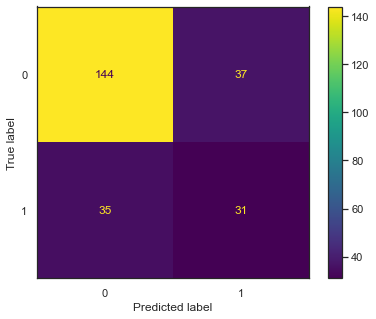

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predict, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_svm.classes_)

disp.plot()
plt.show()